# 점화식 유도
1. $\sqrt{k} = x$라고 했을 때, $x^2-k=0$라는 방정식을 세울 수 있다. 여기서 $f(x)=x^2-k$라고 하자.
2. $f(x_n)>0$이 되게 하는 점 $x_n$에 대해 $(x_n, f(x_n))$의 접선의 방정식을 구해보면 아래와 같다.
   - $g(x) = 2x_n (x-x_n) + f(x_n) = 2x_nx - x_n^2 - k$
3. 이 접선에서 $x$ 절편값을 구하면 아래와 같다.
   - $x_{n+1} = \frac{1}{2} \left(x_n + \frac{k}{x_n} \right)$
4. 이 $x_{n+1}$은 $x_n$보다 $\sqrt{k}$에 가까운 값이며 점화식을 반복해갈수록 제곱근값에 가까워진다.
    1. $k < x^2_n \rightarrow \frac{k}{x_n} < x_n  \rightarrow 2x_{n+1}=x_n+\frac{k}{x_n} < 2x_n$
    2. $\left( x_n - \frac{k}{x_n} \right) ^2 > 0 \rightarrow x_n^2 - 2k + \frac{k^2}{x_n^2} > 0 \rightarrow x_n^2 + 2k + \frac{k^2}{x_n^2} > 4k \rightarrow \left( x_n + \frac{k}{x_n} \right) ^2 > 4k \rightarrow 2x_{n+1} = x_n + \frac{k}{x_n} > 2\sqrt{k}$
    - $\therefore \sqrt{k} < x_{n+1} < x_n$

In [1]:
import numpy as np

k = 100

def f(x, k=k):
    return x**2 - k

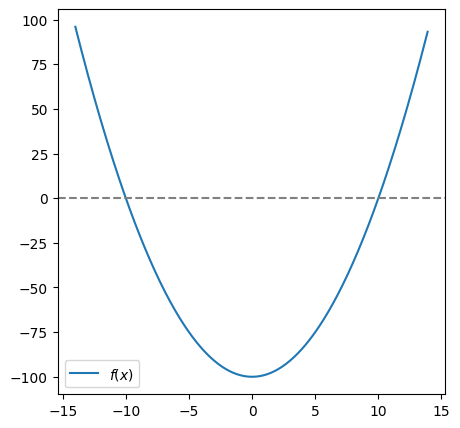

In [19]:
import matplotlib.pyplot as plt

xs = np.arange(-14, 14, 0.1)
ys = f(xs)

plt.figure(figsize=(5, 5))
plt.plot(xs, ys, label='$f(x)$')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.show()

In [3]:
x0 = 13
f(x0)

69

In [4]:
def g(x, xn=x0, k=k):
    return 2*xn*x - xn**2 - k

In [5]:
xs2 = np.arange(9, 14, 0.1)
ys2 = g(xs2)

In [6]:
def x_intercept(xn, k):
    return (xn + k/xn)/2

In [7]:
intercept = x_intercept(x0, k)
intercept

10.346153846153847

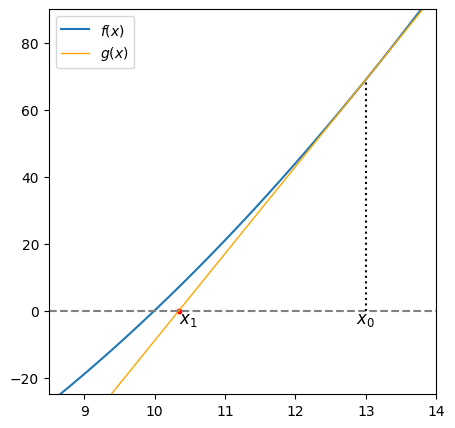

In [8]:
plt.figure(figsize=(5, 5))
plt.plot(xs, ys, label='$f(x)$')
plt.plot(xs2, ys2, color='orange', linewidth=1, label='$g(x)$')
plt.axhline(y=0, color='gray', linestyle='--')
plt.vlines(ymin=0, ymax=f(x0), x=x0, linestyle=':', color='black')
plt.text(x=x0, y=0, s='$x_0$', va='top', ha='center', fontsize=12)
plt.xlim(8.5, 14)
plt.ylim(-25, 90)
plt.scatter([intercept], [0], color='red', s=10)
plt.text(x=intercept, y=0, s='$x_1$', va='top', ha='left', fontsize=12)
plt.legend()
plt.show()

In [9]:
def root(x):
    tol = 1e-10

    xn0 = x // 2
    xn1 = x_intercept(xn0, x)
    while abs(xn0 - xn1) > tol:
        xn0 = xn1
        xn1 = x_intercept(xn0, x)

    return xn1

In [10]:
root(k)

10.0

In [11]:
root(k) == np.sqrt(k)

True

In [12]:
root(5) == np.sqrt(5)

True

In [13]:
root(5)

2.23606797749979

In [14]:
%%time
root(12345678901234567890)

CPU times: total: 0 ns
Wall time: 0 ns


3513641828.820144

In [15]:
%%time
np.sqrt(12345678901234567890)

CPU times: total: 0 ns
Wall time: 0 ns


3513641828.820144

In [20]:
def root(x):
    tol = 1e-10

    xn0 = x // 2
    xn1 = x_intercept(xn0, x)
    print(xn1)
    while abs(xn0 - xn1) > tol:
        xn0 = xn1
        xn1 = x_intercept(xn0, x)
        print(xn1)

    return xn1

In [21]:
root(10)

3.5
3.178571428571429
3.162319422150883
3.1622776604441363
3.162277660168379
3.162277660168379


3.162277660168379